In [1]:
#import all libraries and dependencies for dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#Reading the Fish CSV file
df_fish = pd.read_csv('https://raw.githubusercontent.com/esharma3/fish_weight_prediction_machine_learning/master/fish_holdout_demo.csv')
#display first 5 rows
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944
1,Parkki,150.0,18.4,20.0,22.4,8.8928,3.2928
2,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
3,Pike,430.0,35.5,38.0,40.5,7.2900,4.5765
4,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225


In [2]:
#get the number of rows and columns
df_fish.shape

(28, 7)

In [3]:
#type of the data
df_fish.dtypes

,0
Species,object
Weight,float64
Length1,float64
Length2,float64
Length3,float64
Height,float64
Width,float64


In [4]:
#description of the data
df_fish.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,28.0,353.978571,311.178187,5.9000,136.250000,266.00000,500.00000,1100.0000
Length1,28.0,25.435714,9.477975,7.5000,18.850000,25.20000,30.80000,43.2000
Length2,28.0,27.514286,10.094799,8.4000,20.525000,27.25000,33.50000,46.0000
Length3,28.0,30.271429,10.945923,8.8000,22.475000,29.75000,39.00000,48.7000
Height,28.0,8.589843,4.039657,1.9782,6.129375,7.57500,12.44800,16.3618
Width,28.0,4.197250,1.499761,1.1484,3.314800,4.32875,4.89235,7.2772


In [5]:
#Checking the null values
df_fish.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [6]:
#Information of the data set
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  28 non-null     object 
 1   Weight   28 non-null     float64
 2   Length1  28 non-null     float64
 3   Length2  28 non-null     float64
 4   Length3  28 non-null     float64
 5   Height   28 non-null     float64
 6   Width    28 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.7+ KB


In [7]:
# Counting the all 7 fish individually in the data set
df_fish['Species'].value_counts()

,count
Species,
Perch,10
Bream,6
Roach,4
Pike,3
Parkki,2
Smelt,2
Whitefish,1


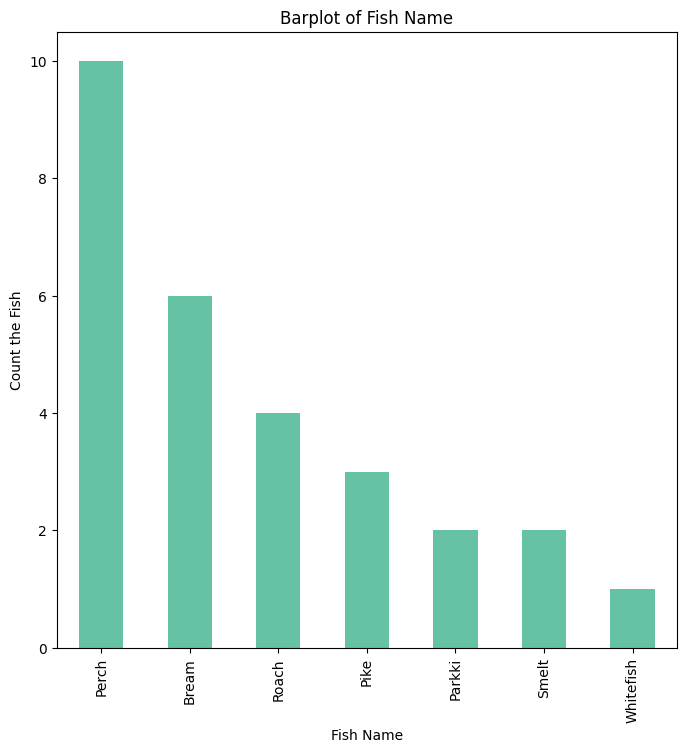

In [8]:
#visualize the count of each type of fish
plt.figure(figsize=(8,8))
ax = df_fish['Species'].value_counts().plot(kind = 'bar', stacked=True, colormap = 'Set2')
plt.title('Barplot of Fish Name')
plt.xlabel('Fish Name')
plt.ylabel('Count the Fish')
plt.show()

In [9]:
#checking for duplicates
df_fish.duplicated().sum()

0

In [10]:
#get the biggest value for weight
df_fish[df_fish['Weight'] == df_fish['Weight'].max()]

,Species,Weight,Length1,Length2,Length3,Height,Width
25,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684


In [11]:
#get the smallest value for weight
df_fish[df_fish['Weight'] == df_fish['Weight'].min()]

,Species,Weight,Length1,Length2,Length3,Height,Width
16,Perch,5.9,7.5,8.4,8.8,2.112,1.408


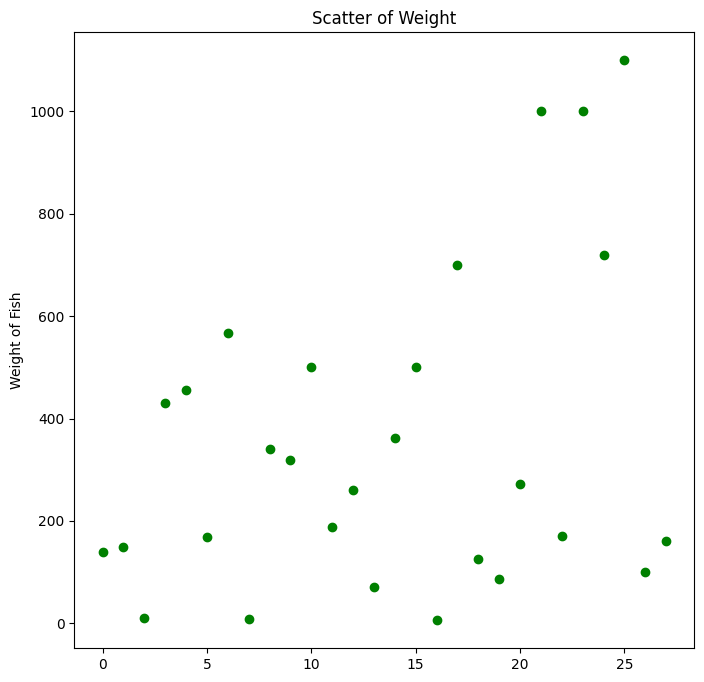

In [12]:
#Scatter plot of weight variable
plt.figure(figsize = (8, 8))
plt.scatter(x = np.arange(len(df_fish)), y = df_fish['Weight'], c = 'green')
plt.title('Scatter of Weight')
plt.ylabel('Weight of Fish')
plt.show()

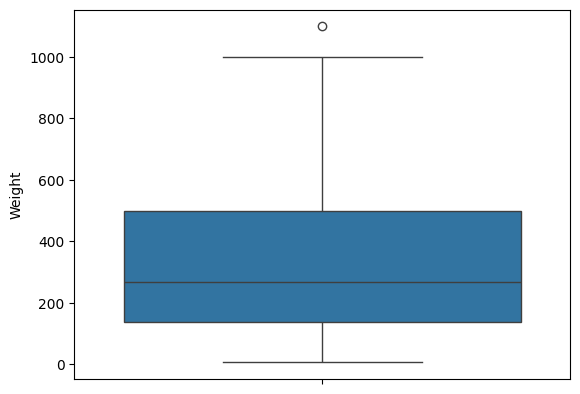

In [13]:
#Boxplot of weight variable
sns.boxplot(y='Weight',data = df_fish)
plt.show()

In [14]:
#get the details of particular type of fish
df_fish[df_fish['Species']=='Perch']

,Species,Weight,Length1,Length2,Length3,Height,Width
9,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716
11,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658
12,Perch,260.0,25.4,27.5,28.9,7.1672,4.3350
13,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
16,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
18,Perch,125.0,19.0,21.0,22.5,5.6925,3.6675
22,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
23,Perch,1000.0,39.8,43.0,45.2,11.9328,7.2772
25,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
26,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216


<Figure size 1500x1500 with 0 Axes>

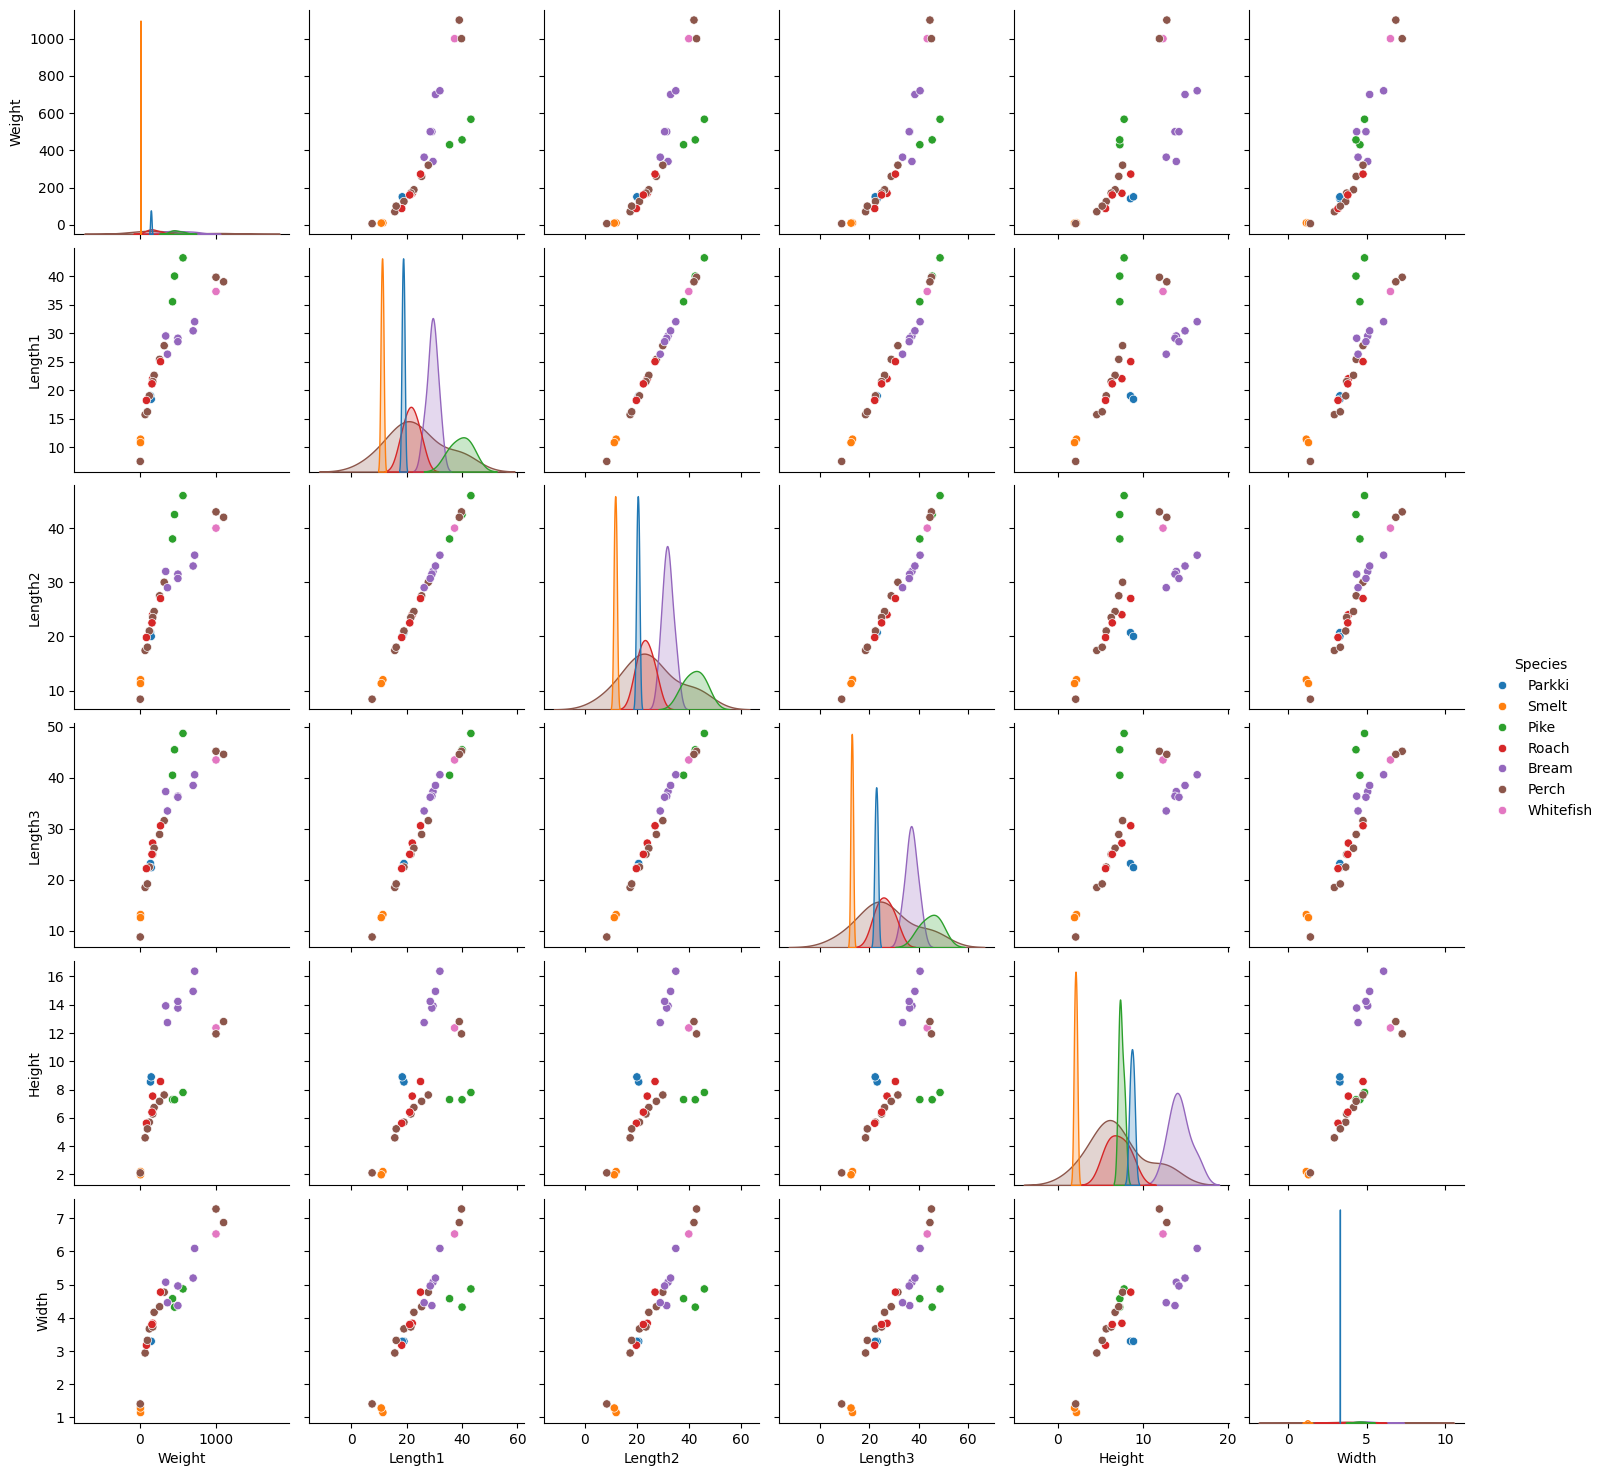

In [15]:
# Pairplot of dataset
plt.figure(figsize=(15, 15))
sns.pairplot(df_fish, hue="Species")
plt.show()

<Figure size 1000x600 with 0 Axes>

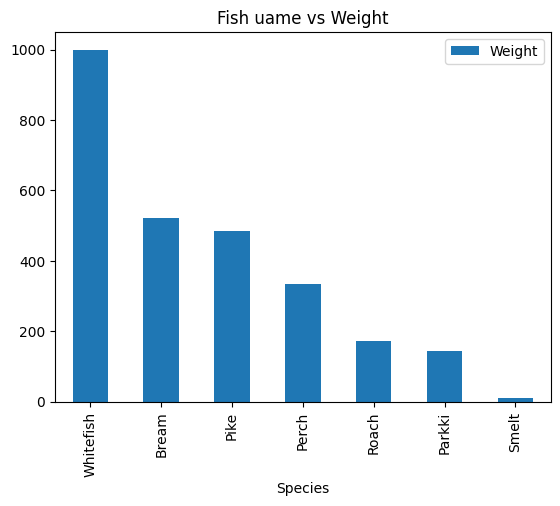

In [16]:
# The bar plot of fish and their corresponding mean weight
plt.figure(figsize=(10, 6))
df_fishx = pd.DataFrame(df_fish.groupby(['Species'])['Weight'].mean().sort_values(ascending = False))
df_fishx.plot.bar()
plt.title('Fish uame vs Weight')
plt.show()

In [17]:
#delete the species
del df_fish['Species']

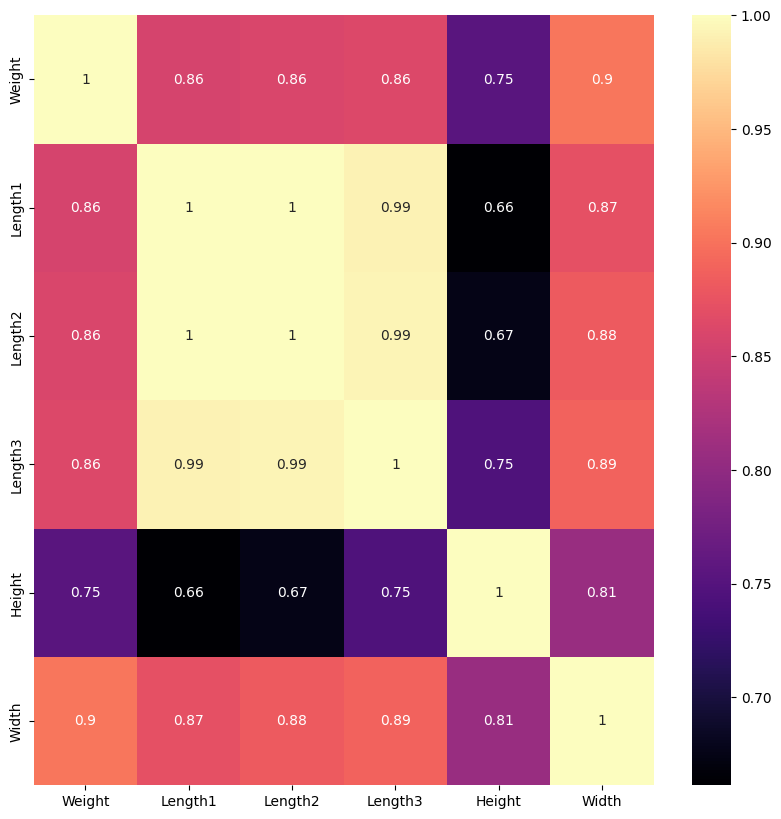

In [18]:
x=df_fish.iloc[:,1:]
y=df_fish.iloc[:,0:1]

# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
# standardization of the data set
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

# Heat map of the data set
plt.figure(figsize = (10, 10))
sns.heatmap(df_fish.corr(), cmap="magma", annot=True)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 55)
x_poly = poly.fit_transform(x_train)
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()
reg_1.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = reg_1.predict(x_train)
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.9113391689045556

In [21]:
#Reading the CSV file
df= pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/refs/heads/master/StudentsPerformance.csv')

#display first 5 rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
# types of data
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [23]:
#description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [24]:
#Checking the null values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [25]:
#Information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
#counting all race/ethnicity individually
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


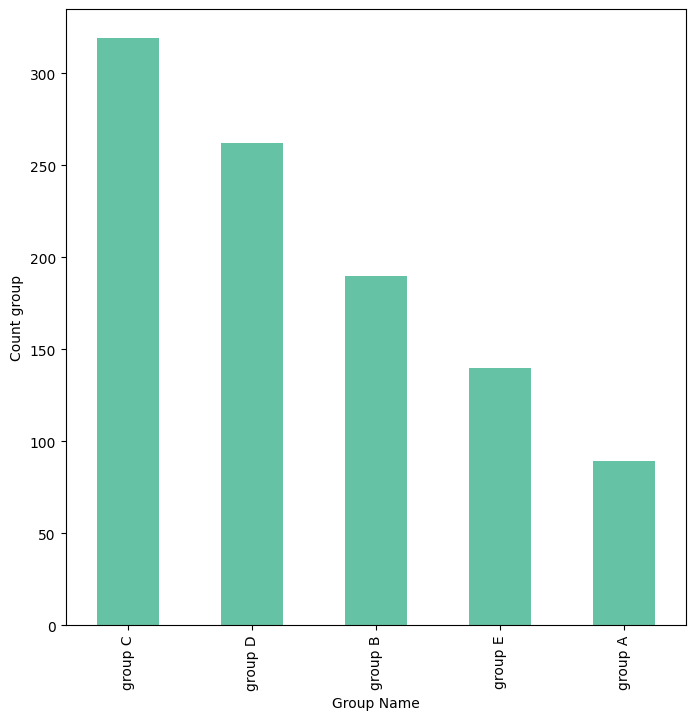

In [27]:
#visualize th count of each group
plt.figure(figsize=(8,8))
ax=df['race/ethnicity'].value_counts().plot(kind='bar',colormap='Set2')
plt.xlabel('Group Name')
plt.ylabel('Count group')
plt.show()

In [28]:
#Checking for duplicaates
df.duplicated().sum()

0